### Este código me tocó corregirlo por completo, ya que, mi propuesta de solución contenía bastantes errores. En primer lugar defino un bloque que me mostrará gráficamente la curva de Bezier.

In [26]:
import matplotlib.pyplot as plt       #Uso solo para graficar
Cx1_list = []       #Uso solo para graficar
Cy1_list = []
Cx2_list = []
Cy2_list = []

### Este código calcula las velocidades de dos motores necesarios para seguir una curva de Bézier cúbica en un número de pasos definidos (t). Calcula las posiciones intermedias en la curva y determina las velocidades lineales y angulares necesarias para mover los motores de manera que sigan la trayectoria planificada. Finalmente, imprime las velocidades de los motores en cada paso.

In [27]:
import math
p0=[1,0]
p1=[1,-2]
p2=[6,3]
p3=[3,3]
Lista=[]       #Almacenar las velocidades del motor
b=2       #Distancia del motor al centro de gravedad
T=5       #Tiempo de llegar de un punto a otro
r=1       #Radio de las ruedas
t=5       #Cantidad de pasos
for i in range(t):       #ERROR DE NO PONER LOS PARENTESIS

  Lista2=[]       #Lista que conformara los elementos de una lista de listas

  m1=i/t       #Define la curva de bezier de 0 a 1
  z1=(1-m1)

  Cx1=z1*z1*z1*p0[0]+3*z1*z1*m1*p1[0]+3*z1*m1*m1*p2[0]+m1*m1*m1*p3[0]
  Cy1=z1*z1*z1*p0[1]+3*z1*z1*m1*p1[1]+3*z1*m1*m1*p2[1]+m1*m1*m1*p3[1]

  Cx1_list.append(Cx1)       #Uso solo para graficar
  Cy1_list.append(Cy1)       #Uso solo para graficar

  m2=(i+1)/t
  z2=(1-m2)

  Cx2=z2*z2*z2*p0[0]+3*z2*z2*m2*p1[0]+3*z2*m2*m2*p2[0]+m2*m2*m2*p3[0]
  Cy2=z2*z2*z2*p0[1]+3*z2*z2*m2*p1[1]+3*z2*m2*m2*p2[1]+m2*m2*m2*p3[1]

  Cx2_list.append(Cx2)       #Uso solo para graficar
  Cy2_list.append(Cy2)       #Uso solo para graficar

  Gama1=math.atan2(Cy1,Cx1)
  Gama2=math.atan2(Cy2,Cx2)

  DTau1=(T/t)*i
  DTau2=(T/t)*(i+1)
  DTauTotal=DTau2-DTau1

  Ux=Cx2-Cx1
  Uy=Cy2-Cy1
  E=math.sqrt(Ux*Ux+Uy*Uy)
  V=E/DTauTotal

  wi=(Gama2-Gama1)/DTauTotal

  MotorD=(1/r)*(V+b*wi)
  MotorI=(1/r)*(V-b*wi)

  #Necesitaba añadir uno por uno si fuera una lista adicional
  Lista2.append(MotorD)
  Lista2.append(MotorI)

  VELOCIDADES=(MotorD,MotorI)       #Sugerencia del profesor

  Lista.append(VELOCIDADES)
  #Lista.append(Lista2)       #SI QUISIERA HACER UNA LISTA DE LISTAS

print(Lista)

[(0.08202686297890693, 1.2654923391106225), (1.9936201776097413, 0.5116446786479745), (2.1378611165496584, 0.9808257866196883), (1.582336679260815, 0.7809559391002718), (1.5124510308649008, 0.6277844701956719)]


### Acá mostramos gráficamente el resultado de Bezier

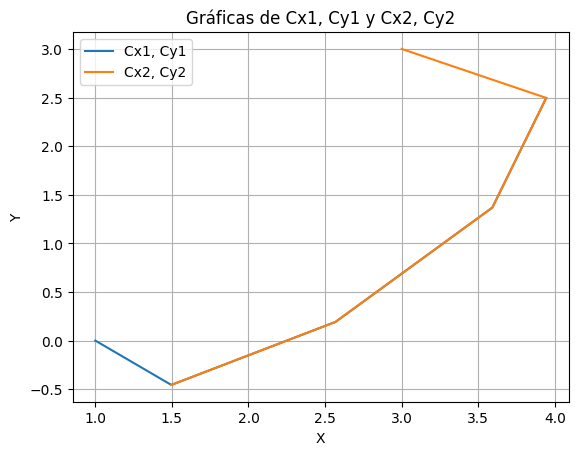

In [28]:
plt.plot(Cx1_list, Cy1_list, label='Cx1, Cy1')
plt.plot(Cx2_list, Cy2_list, label='Cx2, Cy2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráficas de Cx1, Cy1 y Cx2, Cy2')
plt.legend()
plt.grid(True)
plt.show()


### Acá se realiza mediante el uso de una definición de la función Bezzier


In [29]:
import math

def Bezzier(p0=[1,0],p1=[1,-2],p2=[6,3],p3=[3,3],b=2,T=5,r=1,t=5):

  Lista=[]
  for i in range(t):
    Lista2=[]
    m1=i/t       #Define la curva de bezier de 0 a 1
    z1=(1-m1)

    Cx1=z1*z1*z1*p0[0]+3*z1*z1*m1*p1[0]+3*z1*m1*m1*p2[0]+m1*m1*m1*p3[0]
    Cy1=z1*z1*z1*p0[1]+3*z1*z1*m1*p1[1]+3*z1*m1*m1*p2[1]+m1*m1*m1*p3[1]

    m2=(i+1)/t
    z2=(1-m2)

    Cx2=z2*z2*z2*p0[0]+3*z2*z2*m2*p1[0]+3*z2*m2*m2*p2[0]+m2*m2*m2*p3[0]
    Cy2=z2*z2*z2*p0[1]+3*z2*z2*m2*p1[1]+3*z2*m2*m2*p2[1]+m2*m2*m2*p3[1]

    Gama1=math.atan2(Cy1,Cx1)
    Gama2=math.atan2(Cy2,Cx2)

    DTau1=(T/t)*i
    DTau2=(T/t)*(i+1)
    DTauTotal=DTau2-DTau1

    Ux=Cx2-Cx1
    Uy=Cy2-Cy1
    E=math.sqrt(Ux*Ux+Uy*Uy)
    V=E/DTauTotal

    wi=(Gama2-Gama1)/DTauTotal

    MotorD=(1/r)*(V+b*wi)
    MotorI=(1/r)*(V-b*wi)

    VELOCIDADES=(MotorD,MotorI)       #Sugerencia del profesor

    Lista.append(VELOCIDADES)

  return Lista

resultado = Bezzier()
print(resultado)

[(0.08202686297890693, 1.2654923391106225), (1.9936201776097413, 0.5116446786479745), (2.1378611165496584, 0.9808257866196883), (1.582336679260815, 0.7809559391002718), (1.5124510308649008, 0.6277844701956719)]
